<a href="https://colab.research.google.com/github/Nageswar-Sahoo/EVA-8/blob/main/Untitled1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import torch
import torchvision # provide access to datasets, models, transforms, utils, etc
import torchvision.transforms as transforms

In [4]:

train_set = torchvision.datasets.MNIST(
    root='./data'
    ,train=True
    ,download=True
    ,transform=transforms.Compose([
        transforms.ToTensor()
    ])
)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [ ]:
train_set

In [ ]:
sample = next(iter(train_set))
sample

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [ ]:
x = torch.tensor(4)
F.one_hot(x, num_classes=9).squeeze()

tensor([0, 0, 0, 0, 1, 0, 0, 0, 0])

In [ ]:
F.one_hot(x, num_classes=9).squeeze().numpy().tolist()

In [5]:
from torch.utils.data import Dataset
from random import randint
import torch
import torch.nn.functional as F

class MNISTWithAdditionDataset(Dataset):
  def __init__(self):
    
    train_set = torchvision.datasets.MNIST(
     root='./data'
     ,train=True
     ,download=True
     ,transform=transforms.Compose([
         transforms.ToTensor()
     ])
    )
    test_set = torchvision.datasets.MNIST(
     root='./data'
     ,train=False
     ,download=True
     ,transform=transforms.Compose([
        transforms.ToTensor()
     ])
    )

    self.data = [];

    
    for train_set_it in train_set:
         num1= randint(0,9)
         tup1 = (train_set_it[0], F.one_hot(torch.tensor(num1), num_classes=10).squeeze().type(torch.float32)),  
         tup2 = (train_set_it[1], torch.tensor(train_set_it[1]+ num1)), 
         self.data.append(tup1+ tup2) 
    for test_set_it in test_set:
         num1= randint(0,9)
         tup1 = (test_set_it[0], F.one_hot(torch.tensor(num1), num_classes=10).squeeze().type(torch.float32)),  
         tup2 = (test_set_it[1],torch.tensor(train_set_it[1]+ num1)), 
         self.data.append(tup1+ tup2)      

    
  def __getitem__(self, index):
    return self.data[index]

  def __len__(self):
    return len(self.data)

myData = MNISTWithAdditionDataset()

for m in myData:
  print(m)
  break;

((tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.000

In [ ]:
batch = next(iter(train_loader))
batch

[[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
            [0., 0., 0.,  ..., 0., 0., 0.],
            [0., 0., 0.,  ..., 0., 0., 0.],
            ...,
            [0., 0., 0.,  ..., 0., 0., 0.],
            [0., 0., 0.,  ..., 0., 0., 0.],
            [0., 0., 0.,  ..., 0., 0., 0.]]],
  
  
          [[[0., 0., 0.,  ..., 0., 0., 0.],
            [0., 0., 0.,  ..., 0., 0., 0.],
            [0., 0., 0.,  ..., 0., 0., 0.],
            ...,
            [0., 0., 0.,  ..., 0., 0., 0.],
            [0., 0., 0.,  ..., 0., 0., 0.],
            [0., 0., 0.,  ..., 0., 0., 0.]]]]),
  tensor([[0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])],
 [tensor([8, 9]),
  tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
          [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]])]]

In [7]:
import torch.nn as nn

class FashionCNNI(nn.Module):
    
    def __init__(self):
        super(FashionCNNI, self).__init__()
        
        self.layer1 = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        
        self.layer2 = nn.Sequential(
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        
        self.fc1 = nn.Linear(in_features=64*6*6, out_features=600)
        self.drop = nn.Dropout2d(0.25)
        self.fc2 = nn.Linear(in_features=600, out_features=120)
        self.fc3 = nn.Linear(in_features=120, out_features=20)
        self.fc3_a = nn.Linear(in_features=10, out_features=20)
        self.fc5_a = nn.Linear(in_features=40, out_features=20)
        self.out = nn.Linear(in_features=20, out_features=10)
        self.out_a = nn.Linear(in_features=20, out_features=19)
        
    def forward(self, image,  num):
        out = self.layer1(image)
        out = self.layer2(out)
        out = out.view(out.size(0), -1)
        out = self.fc1(out)
        out = self.drop(out)
        out = self.fc2(out)
        out = self.fc3(out)


        x_add=self.fc3_a(num)
        x_add = F.relu(x_add)

        x_concat = torch.stack((x_add, out), -1)
        x_concat = x_concat.reshape(-1, 40)


        x_concat = self.fc5_a(x_concat)
        x_concat = F.relu(x_concat)
        
        out = self.out(out)
        #out = F.softmax(out, dim=1)
        x_concat = self.out_a(x_concat)
        #x_concat = F.softmax(x_concat, dim=1)
        
        return (out ,  x_concat)

In [ ]:
y= torch.tensor([1,2,3,4])
z= torch.tensor([5,6,7,8])

In [9]:
def get_num_correct(preds, labels):
  return preds.argmax(dim=1).eq(labels).sum().item()

In [10]:
train_loader = torch.utils.data.DataLoader(myData, batch_size=100)
test_loader = torch.utils.data.DataLoader(myData, batch_size=100)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
from torch.autograd import Variable


model = FashionCNNI()
model.to(device)

error = nn.CrossEntropyLoss()

learning_rate = 0.001
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
print(model)

FashionCNNI(
  (layer1): Sequential(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer2): Sequential(
    (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc1): Linear(in_features=2304, out_features=600, bias=True)
  (drop): Dropout2d(p=0.25, inplace=False)
  (fc2): Linear(in_features=600, out_features=120, bias=True)
  (fc3): Linear(in_features=120, out_features=20, bias=True)
  (fc3_a): Linear(in_features=10, out_features=20, bias=True)
  (fc5_a): Linear(in_features=40, out_features=20, bias=True)
  (out): Linear(in_features=20, out_features=10, bias=True)
  (out_

In [ ]:
num_epochs = 5
count = 0
# Lists for visualization of loss and accuracy 
loss_list = []
iteration_list = []
accuracy_list = []

# Lists for knowing classwise accuracy
predictions_list = []
labels_list = []

for epoch in range(num_epochs):
    for images, labels in train_loader:
        # Transfering images and labels to GPU if available
        #images_rnum, labels = images.to(device), labels.to(device)
        image,rnum = images
        image=image.to(device)
        rnum=rnum.to(device)
        lablels1=labels[0].to(device)
        lablels2=labels[1].to(device)
        
        
        # Forward pass 
        outputs = model(image, rnum)
        loss = error(outputs[0], lablels1) + error(outputs[1], lablels2)
        
        # Initializing a gradient as 0 so there is no mixing of gradient among the batches
        optimizer.zero_grad()
        
        #Propagating the error backward
        loss.backward()
        
        # Optimizing the parameters
        optimizer.step()
    
        count += 1
    
    # Testing the model
    
        if not (count % 50):    # It's same as "if count % 50 == 0"
            total = 0
            correct = 0
        
            for images, labels in test_loader:
                labels_list.append(labels[0])
                labels_list.append(labels[1])

                image,rnum = images
                image=image.to(device)
                rnum=rnum.to(device)
                lablels1=labels[0].to(device)
                lablels2=labels[1].to(device)
            
            
                outputs = model(image, rnum)
            
                predictions = torch.max(outputs[0], 1)[1].to(device)

                predictions1 = torch.max(outputs[1], 1)[1].to(device)


                predictions_list.append(predictions)
                predictions_list.append(predictions1)

                correct += (predictions == lablels1).sum()
                correct += (predictions1 == lablels2).sum()
            
                total += len(lablels1)
                total += len(lablels2)
            
            accuracy = correct * 100 / total
            loss_list.append(loss.data)
            iteration_list.append(count)
            accuracy_list.append(accuracy)
        
        if not (count % 500):
            print("Iteration: {}, Loss: {}, Accuracy: {}%".format(count, loss.data, accuracy))

Iteration: 500, Loss: 0.21152211725711823, Accuracy: 93.62428283691406%
Iteration: 1000, Loss: 0.13246694207191467, Accuracy: 93.07286071777344%
Iteration: 1500, Loss: 0.13069947063922882, Accuracy: 93.86285400390625%
Iteration: 2000, Loss: 0.16777819395065308, Accuracy: 93.57286071777344%
Iteration: 2500, Loss: 0.22370129823684692, Accuracy: 93.5585708618164%
Iteration: 3000, Loss: 0.19030031561851501, Accuracy: 94.64142608642578%
Iteration: 3500, Loss: 0.13774093985557556, Accuracy: 95.43714141845703%


In [11]:
num_epochs = 2
count = 0
# Lists for visualization of loss and accuracy 
loss_list = []
iteration_list = []
accuracy_list = []
accuracy_list_addition = []

# Lists for knowing classwise accuracy
predictions_list = []
labels_list = []

predictions_list1 = []
labels_list1 = []

for epoch in range(num_epochs):
    for images, labels in train_loader:
        # Transfering images and labels to GPU if available
        #images_rnum, labels = images.to(device), labels.to(device)
        image,rnum = images
        image=image.to(device)
        rnum=rnum.to(device)
        lablels1=labels[0].to(device)
        lablels2=labels[1].to(device)
    
       
        
        # Forward pass 
        outputs = model(image, rnum)
        loss = error(outputs[0], lablels1) + error(outputs[1], lablels2)
        
        # Initializing a gradient as 0 so there is no mixing of gradient among the batches
        optimizer.zero_grad()
        
        #Propagating the error backward
        loss.backward()
        
        # Optimizing the parameters
        optimizer.step()
    
        count += 1
    
    # Testing the model
    
        if not (count % 50):    # It's same as "if count % 50 == 0"
            total = 0
            total_addition = 0
            correct = 0
            correct_addition = 0
        
            for images, labels in test_loader:
                labels_list.append(labels[0])
                labels_list1.append(labels[1])

                image,rnum = images
                image=image.to(device)
                rnum=rnum.to(device)
                lablels1=labels[0].to(device)
                lablels2=labels[1].to(device)
            
            
                outputs = model(image, rnum)
            
                predictions = torch.max(outputs[0], 1)[1].to(device)

                predictions1 = torch.max(outputs[1], 1)[1].to(device)


                predictions_list.append(predictions)
                predictions_list1.append(predictions1)

                correct += (predictions == lablels1).sum()
                correct_addition += (predictions1 == lablels2).sum()

                print("Actual Image Number")
                print(lablels1)

                print("Predicted Image Number")
                print(predictions)

                print("Actual Number Afetr addition ")
                print(lablels2)

                print("Predicted Number Afetr addition ")
                print(predictions1)
            
                total += len(lablels1)
                total_addition += len(lablels2)
            
            accuracy_number = correct * 100 / total
            accuracy_addition = correct_addition * 100 / total_addition
            loss_list.append(loss.data)
            iteration_list.append(count)
            accuracy_list.append(accuracy_number)
            accuracy_list_addition.append(accuracy_addition)
        
        if not (count % 500):
            print("Iteration: {}, Loss: {}, Accuracy Number: {}% , Accuracy Addition: {}%".format(count, loss.data, accuracy_number,accuracy_addition))

/usr/local/lib/python3.8/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)


Streaming output truncated to the last 5000 lines.
         9,  8, 12, 10,  9,  9, 14, 10, 14,  8], device='cuda:0')
Predicted Number Afetr addition 
tensor([15, 10, 13, 13, 12, 11, 13,  9, 13, 14,  8, 15,  8, 14, 11, 14, 11, 10,
        13, 11, 12, 17, 14, 11, 15,  8, 13, 10, 17,  8, 15,  9, 13, 13, 13, 12,
         9, 12, 17, 16, 13,  9, 14, 16, 14, 14,  9, 16,  9, 14, 17,  9, 15,  8,
         9,  9, 12, 16, 10, 16, 14, 12, 16, 13, 17, 11, 11, 16, 17, 17, 10, 15,
        12,  9, 17, 14,  9,  8,  9, 13, 10, 14, 11, 11, 12, 15, 14, 15, 17, 12,
         9,  8, 13, 12, 10, 10, 15, 17, 13, 15], device='cuda:0')
Actual Image Number
tensor([5, 4, 2, 3, 0, 7, 9, 9, 0, 3, 6, 6, 2, 0, 2, 3, 9, 6, 6, 4, 0, 8, 7, 6,
        3, 0, 2, 1, 0, 1, 1, 5, 9, 9, 3, 4, 6, 3, 1, 0, 2, 4, 1, 6, 4, 9, 4, 1,
        5, 7, 1, 9, 0, 5, 9, 1, 6, 1, 4, 9, 8, 8, 0, 6, 1, 6, 6, 9, 7, 8, 6, 8,
        7, 8, 7, 2, 0, 7, 7, 4, 6, 5, 9, 8, 7, 3, 8, 5, 6, 4, 6, 7, 3, 6, 7, 5,
        9, 2, 2, 2], device='cuda:0')
Predic

In [12]:
num_epochs = 100
count = 0
# Lists for visualization of loss and accuracy 
loss_list = []
iteration_list = []
accuracy_list = []
accuracy_list_addition = []

# Lists for knowing classwise accuracy
predictions_list = []
labels_list = []

predictions_list1 = []
labels_list1 = []

for epoch in range(num_epochs):
    for images, labels in train_loader:
        # Transfering images and labels to GPU if available
        #images_rnum, labels = images.to(device), labels.to(device)
        image,rnum = images
        image=image.to(device)
        rnum=rnum.to(device)
        lablels1=labels[0].to(device)
        lablels2=labels[1].to(device)
    
       
        
        # Forward pass 
        outputs = model(image, rnum)
        loss = error(outputs[0], lablels1) + error(outputs[1], lablels2)
        
        # Initializing a gradient as 0 so there is no mixing of gradient among the batches
        optimizer.zero_grad()
        
        #Propagating the error backward
        loss.backward()
        
        # Optimizing the parameters
        optimizer.step()
    
        count += 1
    
    # Testing the model
    
        if not (count % 50):    # It's same as "if count % 50 == 0"
            total = 0
            total_addition = 0
            correct = 0
            correct_addition = 0
        
            for images, labels in test_loader:
                labels_list.append(labels[0])
                labels_list1.append(labels[1])

                image,rnum = images
                image=image.to(device)
                rnum=rnum.to(device)
                lablels1=labels[0].to(device)
                lablels2=labels[1].to(device)
            
            
                outputs = model(image, rnum)
            
                predictions = torch.max(outputs[0], 1)[1].to(device)

                predictions1 = torch.max(outputs[1], 1)[1].to(device)


                predictions_list.append(predictions)
                predictions_list1.append(predictions1)

                correct += (predictions == lablels1).sum()
                correct_addition += (predictions1 == lablels2).sum()

                #print("Actual Image Number")
                #print(lablels1)

                #print("Predicted Image Number")
                #print(predictions)

                #print("Actual Number Afetr addition ")
                #print(lablels2)

                #print("Predicted Number Afetr addition ")
                #print(predictions1)
            
                total += len(lablels1)
                total_addition += len(lablels2)
            
            accuracy_number = correct * 100 / total
            accuracy_addition = correct_addition * 100 / total_addition
            loss_list.append(loss.data)
            iteration_list.append(count)
            accuracy_list.append(accuracy_number)
            accuracy_list_addition.append(accuracy_addition)
        
        if not (count % 500):
            print("Iteration: {}, Loss: {}, Accuracy Number: {}% , Accuracy Addition: {}%".format(count, loss.data, accuracy_number,accuracy_addition))

Iteration: 500, Loss: 0.9314156770706177, Accuracy Number: 98.8414306640625% , Accuracy Addition: 69.11856842041016%
Iteration: 1000, Loss: 0.6620985865592957, Accuracy Number: 98.93000030517578% , Accuracy Addition: 73.67285919189453%
Iteration: 1500, Loss: 0.68128901720047, Accuracy Number: 98.53428649902344% , Accuracy Addition: 70.30428314208984%
Iteration: 2000, Loss: 0.5214945077896118, Accuracy Number: 99.19857025146484% , Accuracy Addition: 79.79285430908203%
Iteration: 2500, Loss: 0.2817572057247162, Accuracy Number: 99.0528564453125% , Accuracy Addition: 80.6385726928711%
Iteration: 3000, Loss: 0.29841065406799316, Accuracy Number: 99.15428924560547% , Accuracy Addition: 81.355712890625%
Iteration: 3500, Loss: 0.022083772346377373, Accuracy Number: 98.4942855834961% , Accuracy Addition: 22.644285202026367%
Iteration: 4000, Loss: 0.23250959813594818, Accuracy Number: 99.42428588867188% , Accuracy Addition: 83.65142822265625%
Iteration: 4500, Loss: 0.1914070099592209, Accuracy 

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [29]:
loss_list_c=[]
for a in loss_list:
  loss_list_c.append(a.cpu().numpy())


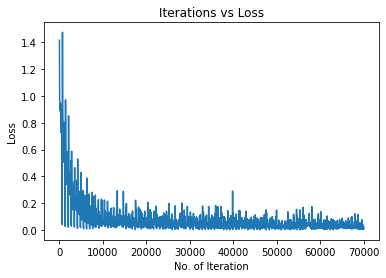

In [31]:
plt.plot(iteration_list, loss_list_c)
plt.xlabel("No. of Iteration")
plt.ylabel("Loss")
plt.title("Iterations vs Loss")
plt.show()

In [33]:
accuracy_list_c=[]
for a in accuracy_list:
  accuracy_list_c.append(a.cpu().numpy())

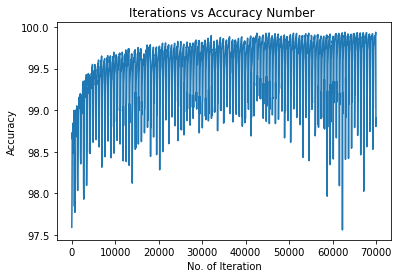

In [34]:
plt.plot(iteration_list, accuracy_list_c)
plt.xlabel("No. of Iteration")
plt.ylabel("Accuracy")
plt.title("Iterations vs Accuracy Number ")
plt.show()

In [35]:
accuracy_list_addition_c=[]
for a in accuracy_list_addition:
  accuracy_list_addition_c.append(a.cpu().numpy())

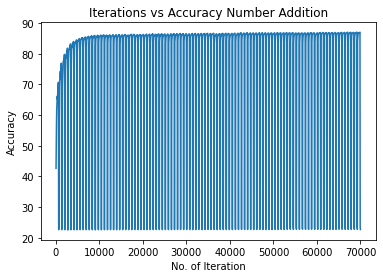

In [36]:
plt.plot(iteration_list, accuracy_list_addition_c)
plt.xlabel("No. of Iteration")
plt.ylabel("Accuracy")
plt.title("Iterations vs Accuracy Number Addition")
plt.show()

In [ ]:
num_epochs = 2
count = 0
# Lists for visualization of loss and accuracy 
loss_list = []
iteration_list = []
accuracy_list = []
accuracy_list_addition = []

# Lists for knowing classwise accuracy
predictions_list = []
labels_list = []

predictions_list1 = []
labels_list1 = []

for epoch in range(num_epochs):
    for images, labels in train_loader:
        # Transfering images and labels to GPU if available
        #images_rnum, labels = images.to(device), labels.to(device)
        image,rnum = images
        image=image.to(device)
        rnum=rnum.to(device)
        lablels1=labels[0].to(device)
        lablels2=labels[1].to(device)
    
       
        
        # Forward pass 
        outputs = model(image, rnum)
        loss = error(outputs[0], lablels1) + error(outputs[1], lablels2)
        
        # Initializing a gradient as 0 so there is no mixing of gradient among the batches
        optimizer.zero_grad()
        
        #Propagating the error backward
        loss.backward()
        
        # Optimizing the parameters
        optimizer.step()
    
        count += 1
    
    # Testing the model
    
        if not (count % 50):    # It's same as "if count % 50 == 0"
            total = 0
            total_addition = 0
            correct = 0
            correct_addition = 0
        
            for images, labels in test_loader:
                labels_list.append(labels[0])
                labels_list1.append(labels[1])

                image,rnum = images
                image=image.to(device)
                rnum=rnum.to(device)
                lablels1=labels[0].to(device)
                lablels2=labels[1].to(device)
            
            
                outputs = model(image, rnum)
            
                predictions = torch.max(outputs[0], 1)[1].to(device)

                predictions1 = torch.max(outputs[1], 1)[1].to(device)


                predictions_list.append(predictions)
                predictions_list1.append(predictions1)

                correct += (predictions == lablels1).sum()
                correct_addition += (predictions1 == lablels2).sum()

                print("Actual Image Number")
                print(lablels1)

                print("Predicted Image Number")
                print(predictions)

                print("Actual Number Afetr addition ")
                print(lablels2)

                print("Predicted Number Afetr addition ")
                print(predictions1)
            
                total += len(lablels1)
                total_addition += len(lablels2)
            
            accuracy_number = correct * 100 / total
            accuracy_addition = correct_addition * 100 / total_addition
            loss_list.append(loss.data)
            iteration_list.append(count)
            accuracy_list.append(accuracy_number)
            accuracy_list_addition.append(accuracy_addition)
        
        if not (count % 500):
            print("Iteration: {}, Loss: {}, Accuracy Number: {}% , Accuracy Addition: {}%".format(count, loss.data, accuracy_number,accuracy_addition))

/usr/local/lib/python3.8/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)


Streaming output truncated to the last 5000 lines.
        12,  9,  4,  7, 10,  5, 14,  9,  7,  7], device='cuda:0')
Actual Image Number
tensor([2, 6, 8, 0, 4, 1, 0, 1, 5, 8, 5, 0, 9, 4, 8, 7, 6, 7, 1, 6, 0, 3, 9, 6,
        3, 0, 6, 1, 8, 3, 7, 5, 3, 4, 3, 2, 6, 1, 1, 1, 4, 8, 5, 3, 9, 5, 3, 6,
        0, 7, 1, 5, 6, 2, 8, 0, 9, 6, 8, 7, 2, 1, 1, 2, 1, 5, 9, 8, 8, 1, 6, 9,
        8, 3, 9, 8, 3, 2, 4, 8, 5, 8, 9, 7, 2, 1, 6, 7, 8, 9, 4, 2, 9, 0, 4, 1,
        7, 2, 9, 3], device='cuda:0')
Predicted Image Number
tensor([2, 6, 8, 0, 4, 1, 0, 1, 5, 8, 5, 0, 9, 4, 8, 7, 6, 7, 1, 6, 0, 3, 9, 6,
        3, 0, 6, 1, 8, 3, 7, 5, 3, 4, 3, 2, 6, 1, 1, 1, 4, 8, 5, 3, 9, 5, 3, 6,
        0, 7, 1, 5, 6, 2, 8, 0, 9, 6, 8, 7, 2, 1, 1, 2, 1, 5, 9, 8, 8, 1, 6, 9,
        8, 3, 9, 8, 3, 2, 4, 8, 5, 8, 9, 7, 2, 1, 6, 7, 8, 9, 4, 2, 9, 0, 4, 1,
        7, 2, 9, 3], device='cuda:0')
Actual Number Afetr addition 
tensor([ 8, 15, 16,  9, 12,  4,  7,  9,  8,  8,  9,  6, 13, 13, 13,  9, 13, 16,
         4, 13

In [26]:
train_loader = torch.utils.data.DataLoader(myData, batch_size=100)
test_loader = torch.utils.data.DataLoader(myData, batch_size=100)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
from torch.autograd import Variable
model = FashionCNNI()
model.to(device)

error = nn.CrossEntropyLoss()

learning_rate = 0.001
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
print(model)

FashionCNNI(
  (layer1): Sequential(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer2): Sequential(
    (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc1): Linear(in_features=2304, out_features=600, bias=True)
  (drop): Dropout2d(p=0.25, inplace=False)
  (fc2): Linear(in_features=600, out_features=120, bias=True)
  (fc3): Linear(in_features=120, out_features=20, bias=True)
  (fc3_a): Linear(in_features=10, out_features=20, bias=True)
  (fc5_a): Linear(in_features=40, out_features=20, bias=True)
  (out): Linear(in_features=20, out_features=10, bias=True)
  (out_

In [27]:
num_epochs = 10
count = 0
# Lists for visualization of loss and accuracy 
loss_list = []
iteration_list = []
accuracy_list = []
accuracy_list_addition = []

# Lists for knowing classwise accuracy
predictions_list = []
labels_list = []

predictions_list1 = []
labels_list1 = []

for epoch in range(num_epochs):
    for images, labels in train_loader:
        # Transfering images and labels to GPU if available
        #images_rnum, labels = images.to(device), labels.to(device)
        image,rnum = images
        image=image.to(device)
        rnum=rnum.to(device)
        lablels1=labels[0].to(device)
        lablels2=labels[1].to(device)
    
       
        
        # Forward pass 
        outputs = model(image, rnum)
        loss = error(outputs[0], lablels1) + error(outputs[1], lablels2)
        
        # Initializing a gradient as 0 so there is no mixing of gradient among the batches
        optimizer.zero_grad()
        
        #Propagating the error backward
        loss.backward()
        
        # Optimizing the parameters
        optimizer.step()
    
        count += 1
    
    # Testing the model
    
        if not (count % 50):    # It's same as "if count % 50 == 0"
            total = 0
            total_addition = 0
            correct = 0
            correct_addition = 0
        
            for images, labels in test_loader:
                labels_list.append(labels[0])
                labels_list1.append(labels[1])

                image,rnum = images
                image=image.to(device)
                rnum=rnum.to(device)
                lablels1=labels[0].to(device)
                lablels2=labels[1].to(device)
            
            
                outputs = model(image, rnum)
            
                predictions = torch.max(outputs[0], 1)[1].to(device)

                predictions1 = torch.max(outputs[1], 1)[1].to(device)


                predictions_list.append(predictions)
                predictions_list1.append(predictions1)

                correct += (predictions == lablels1).sum()
                correct_addition += (predictions1 == lablels2).sum()

                #print("Actual Image Number")
                #print(lablels1)

                #print("Predicted Image Number")
                #print(predictions)

                #print("Actual Number Afetr addition ")
                #print(lablels2)

                #print("Predicted Number Afetr addition ")
                #print(predictions1)
            
                total += len(lablels1)
                total_addition += len(lablels2)
            
            accuracy_number = correct * 100 / total
            accuracy_addition = correct_addition * 100 / total_addition
            loss_list.append(loss.data)
            iteration_list.append(count)
            accuracy_list.append(accuracy_number)
            accuracy_list_addition.append(accuracy_addition)
        
        if not (count % 500):
            print("Iteration: {}, Loss: {}, Accuracy Number: {}% , Accuracy Addition: {}%".format(count, loss.data, accuracy_number,accuracy_addition))

Iteration: 500, Loss: 1.8715331554412842, Accuracy Number: 97.31428527832031% , Accuracy Addition: 32.06285858154297%
Iteration: 1000, Loss: 1.3273776769638062, Accuracy Number: 98.105712890625% , Accuracy Addition: 55.47571563720703%
Iteration: 1500, Loss: 0.8654012680053711, Accuracy Number: 98.1914291381836% , Accuracy Addition: 60.99142837524414%
Iteration: 2000, Loss: 0.6473591327667236, Accuracy Number: 98.9142837524414% , Accuracy Addition: 75.9557113647461%
Iteration: 2500, Loss: 0.38562676310539246, Accuracy Number: 98.65571594238281% , Accuracy Addition: 77.93142700195312%
Iteration: 3000, Loss: 0.2754164934158325, Accuracy Number: 98.98857116699219% , Accuracy Addition: 80.44999694824219%
Iteration: 3500, Loss: 0.021701250225305557, Accuracy Number: 98.57571411132812% , Accuracy Addition: 22.644285202026367%
Iteration: 4000, Loss: 0.2595956027507782, Accuracy Number: 99.32142639160156% , Accuracy Addition: 83.29285430908203%
Iteration: 4500, Loss: 0.25449928641319275, Accura

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [29]:
loss_list_c=[]
for a in loss_list:
  loss_list_c.append(a.cpu().numpy())


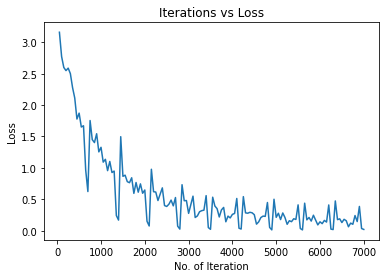

In [30]:
plt.plot(iteration_list, loss_list_c)
plt.xlabel("No. of Iteration")
plt.ylabel("Loss")
plt.title("Iterations vs Loss")
plt.show()

In [31]:
accuracy_list_c=[]
for a in accuracy_list:
  accuracy_list_c.append(a.cpu().numpy())

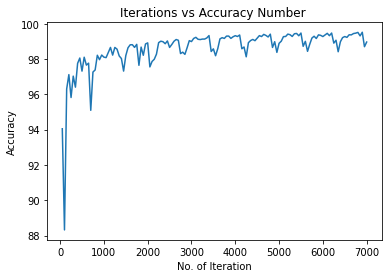

In [32]:
plt.plot(iteration_list, accuracy_list_c)
plt.xlabel("No. of Iteration")
plt.ylabel("Accuracy")
plt.title("Iterations vs Accuracy Number ")
plt.show()

In [33]:
accuracy_list_addition_c=[]
for a in accuracy_list_addition:
  accuracy_list_addition_c.append(a.cpu().numpy())

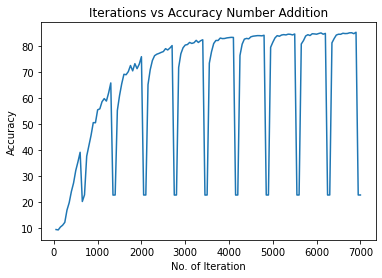

In [34]:
plt.plot(iteration_list, accuracy_list_addition_c)
plt.xlabel("No. of Iteration")
plt.ylabel("Accuracy")
plt.title("Iterations vs Accuracy Number Addition")
plt.show()